# Iris

Classify images of flowers based on their features such as the petal length, petal width, sepal length, and sepal width? Use the Iris Flowers dataset, which contains information on 150 iris flowers belonging to three different species, and apply SVM or random forest to classify the flowers.

## The libraries

Import the necessary libraries

In [120]:
#to manipulate dataframes
import pandas as pd

#to manpulate arrays
import numpy as np

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns # for plots

#to split our dataset into training and testing subsets
from sklearn.model_selection import train_test_split

#use the SVC ...
from sklearn.svm import SVC

# ...
from sklearn.metrics import accuracy_score

## Data Management

### Overview

Load the dataset

In [121]:
iris = pd.read_csv("C:/Users/Mulle/Desktop/AI-mini-project/iris/IRIS_ Flower_Dataset.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data cleanning 

#### Imputation

In [122]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Adding a target column (0 for setosa, 1 for versicolor and 2 for virginica)

In [123]:
target = []

for i in range(len(iris['species'])):
    if iris['species'][i] == "Iris-setosa":
        target.append(0.0)
    elif iris['species'][i] == "Iris-versicolor":
        target.append(1.0)
    else:
        target.append(2.0)


iris['target'] = target

iris

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


#### Outilier detection

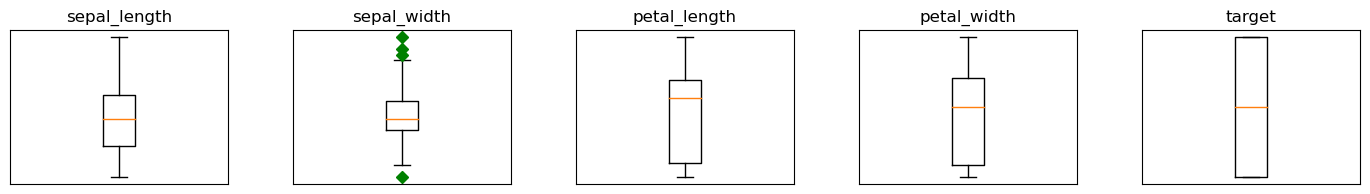

In [124]:
nb_columns = len(iris.select_dtypes(include=["int64", "float64"]).columns)
fig, axs = plt.subplots(1, nb_columns, figsize=(15,2))

for i in range(nb_columns):
        column_name = iris.select_dtypes(include=["int64", "float64"]).columns[i]
        axs[i].boxplot(iris[column_name], 0, 'gD')
        axs[i].set_title(column_name)
        axs[i].set_xticks(()) #removes the graduation on x
        axs[i].set_yticks(()) #removes the graduation on x
fig.subplots_adjust(left=0.08, right=0.98, hspace=0.4, wspace=0.3)

We can see that we have some outlier values in the sepal_width column 

In [125]:
#Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
def find_outliers_IQR(iris):
   q1=iris.quantile(0.25)
   q3=iris.quantile(0.75)
   IQR=q3-q1
   outliers = iris[((iris<(q1-1.5*IQR)) | (iris>(q3+1.5*IQR)))]
   return outliers

for elements in iris.select_dtypes(include=["int64", "float64"]).columns.values:
   outliers = find_outliers_IQR(iris[elements])
   if(len(outliers) != 0):
    print("\n" + elements)
    print("number of outliers:" + str(len(outliers)))
    print("max outlier value:" + str(outliers.max()))
    print("min outlier value:" + str(outliers.min()))


sepal_width
number of outliers:4
max outlier value:4.4
min outlier value:2.0


let's remove the outilier values from our dataset :

In [126]:
def drop_outliers(df, col):
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   IQR= q3-q1
   df_clean = df[((iris[col]>(q1-1.5*IQR)) & (iris[col]<(q3+1.5*IQR)))]
   return df_clean

iris_clean = iris.copy()
iris_clean = drop_outliers(iris, "sepal_width")
iris_clean.shape

(146, 6)

### Feature selection

#### Using random forest

In [127]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

X = iris_clean.drop(['target', 'species'], axis=1)
y = iris_clean.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

#Train
clf.fit(X_train,y_train)


RandomForestClassifier()

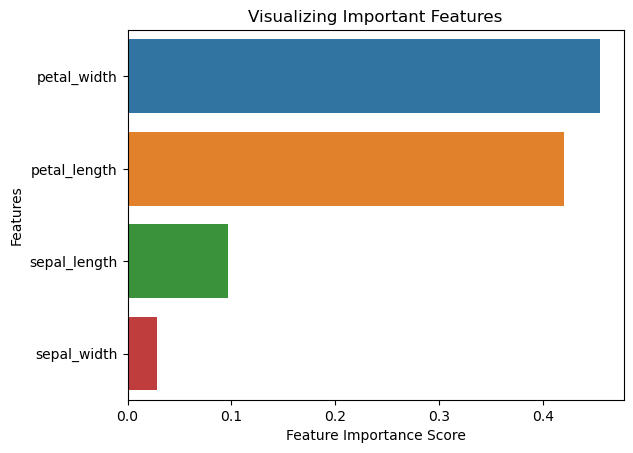

In [128]:

feature_imp = pd.Series(clf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


#### Using the correlation coefficient

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.113977      0.879374     0.822577
sepal_width      -0.113977     1.000000     -0.397123    -0.329782
petal_length      0.879374    -0.397123      1.000000     0.961755
petal_width       0.822577    -0.329782      0.961755     1.000000


[Text(0.5, 1.0, 'Correlation heatmap')]

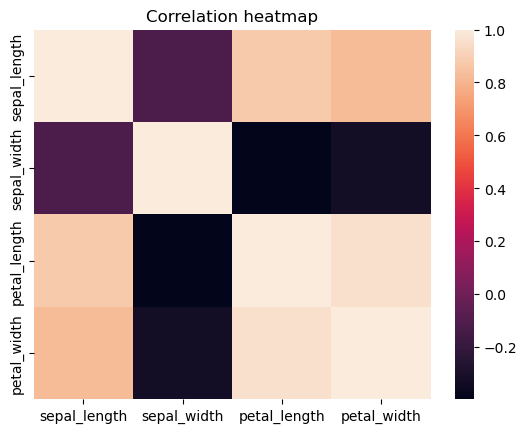

In [129]:
print(iris_clean.drop(columns = ["species", "target"]).corr())
sns.heatmap(iris_clean.drop(columns = ["species", "target"]).corr()).set(title='Correlation heatmap')
#Complete correlation between two variables is expressed by either + 1 or -1

We will choose the 2 variables with the highest correlation coefficient : (petal_width, petal_lenght)

#### Chosen data repartition

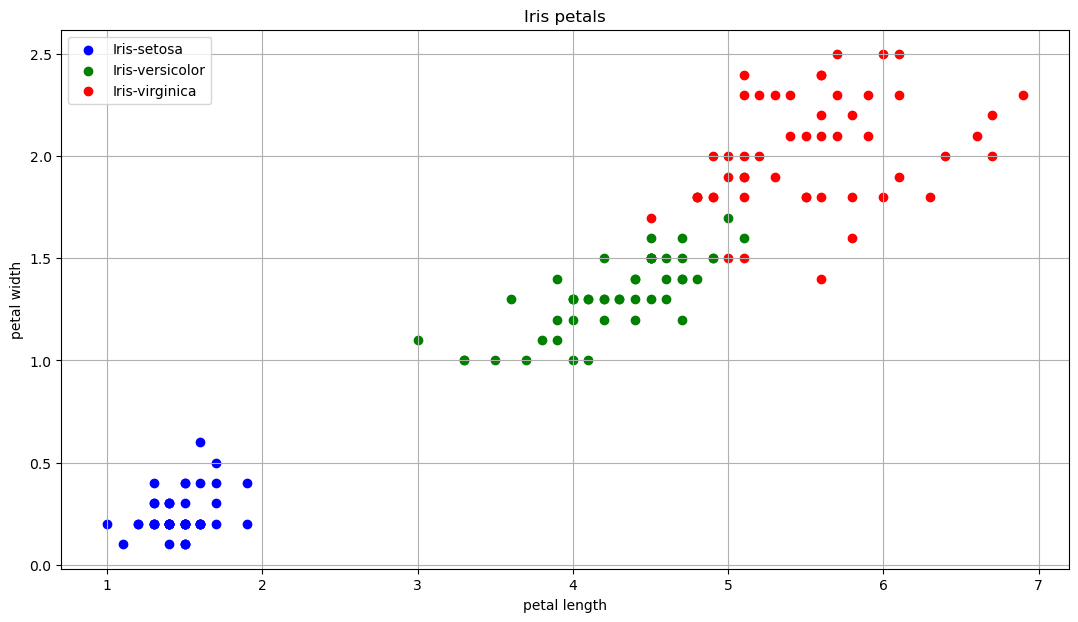

In [130]:
setosa = iris_clean[iris_clean.species == "Iris-setosa"]
versicolor = iris_clean[iris_clean.species=='Iris-versicolor']
virginica = iris_clean[iris_clean.species=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal_length'], setosa['petal_width'], label="Iris-setosa", facecolor="blue")
ax.scatter(versicolor['petal_length'], versicolor['petal_width'], label="Iris-versicolor", facecolor="green")
ax.scatter(virginica['petal_length'], virginica['petal_width'], label="Iris-virginica", facecolor="red")

ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

## Model Selection

### Creating and training the model

#### Split dataset in training and testing data

In [131]:
X = iris_clean.drop(['sepal_length', 'sepal_width', 'target', 'species'], axis=1)
y = iris_clean.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

#### SVM

### hyperparameter tuning

Choosing the right kernel

In [132]:
#check the accuracy of the SVC classifier using different kernels

kernels = ['linear', 'rbf', 'poly']
accuracy = []

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train) #trains the model
    pred = model.predict(X_test) #does prediction
    score = accuracy_score(pred, y_test)
    accuracy.append(score)
    accuracy.append(score)
    print("Accuracy using {}:".format(kernel), score)

score.plot(kind = 'bar')

Accuracy using linear: 0.9629629629629629
Accuracy using rbf: 0.9506172839506173
Accuracy using poly: 0.9629629629629629


AttributeError: 'numpy.float64' object has no attribute 'plot'

#### Grid Search

The GridSearchCV function is used to perform a grid search over the specified hyperparameter values, and the best parameters are selected based on cross-validated performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

best_model = SVC()
# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']  # For 'rbf', 'poly', and 'sigmoid' kernels
}
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the data to perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best SVM model
best_svm_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_svm_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Set Accuracy: 0.9629629629629629


## Visulazing the result

Useful functions to visualize the hyperplanes and the decision surface of SVC

In [ ]:
def make_meshgrid(x, y, h=.02): #Create a mesh of points to plot in
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #Return evenly spaced values within a given interval h
                          np.arange(y_min, y_max, h)) #Return a list of coordinate matrices from coordinate vectors.
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params): #Plots the colored areas corresponding to the decision surface of SVC (the model hyperplane)
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier (kernel)
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### SVM results

##### Results per kernel

c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


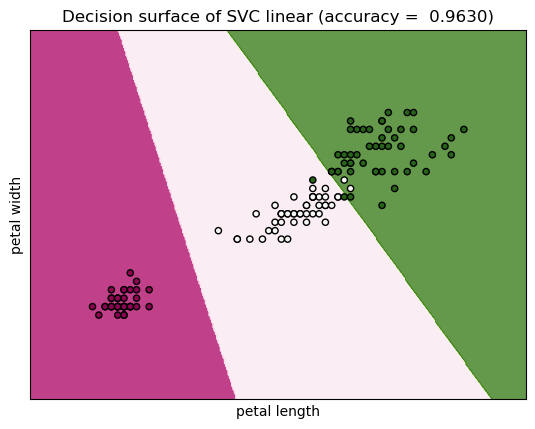

c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


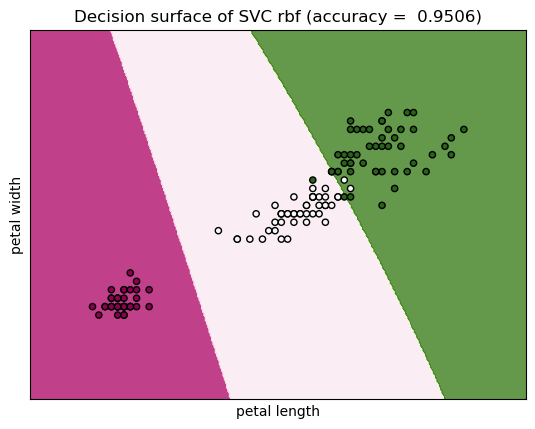

c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


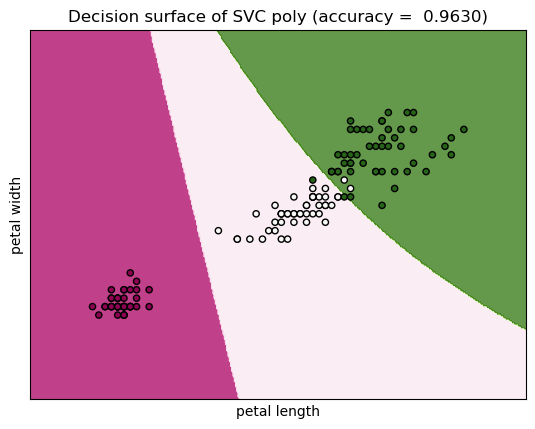

In [ ]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    """mapping data points to a high-dimensional space 
    and then finding the optimal hyperplane that divides the data into two classes"""
    model.fit(X_train, y_train) #trains the model
    
    #Defining the plots
    fig, ax = plt.subplots()
    title = ('Decision surface of SVC {} (accuracy = {: .4f})'.format(model.kernel, accuracy_score(model.predict(X_test), y_test)))
    
    # Set-up grid for plotting.
    X0, X1 = X["petal_length"], X["petal_width"]
    xx, yy = make_meshgrid(X0, X1)

    #Plotting the data
    plot_contours(ax, model, xx, yy, cmap=plt.cm.PiYG, alpha=0.8)
    ax.scatter(X0, X1, 
                    c=y, #set the color to change according to y 
                    cmap=plt.cm.PiYG, #colors of the points
                    s=20, #size of the points
                    edgecolors='k') #color of the edge of the points (black)
    
    #Set graphic elements of the graph
    ax.set_xlabel("petal length")
    ax.set_ylabel("petal width")

    ax.set_xticks(()) #removes the graduation on x
    ax.set_yticks(()) #removes the graduation on y

    #Shows the elments of the graph
    ax.set_title(title)
    plt.show()

#### Best model result

c:\Users\Mulle\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


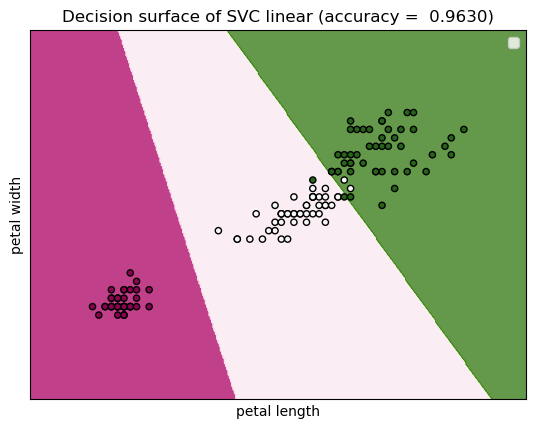

In [ ]:
best_model = SVC(C = 0.1, gamma = 'scale', kernel = 'linear')

best_model.fit(X_train, y_train) #trains the model

#Defining the plots
fig, ax = plt.subplots()
title = ('Decision surface of SVC {} (accuracy = {: .4f})'.format(best_model.kernel, accuracy_score(best_model.predict(X_test), y_test)))

# Set-up grid for plotting.
X0, X1 = X["petal_length"], X["petal_width"]
xx, yy = make_meshgrid(X0, X1)

#Plotting the data
plot_contours(ax, best_model, xx, yy, cmap=plt.cm.PiYG, alpha=0.8) #Plots the colored areas corresponding to the decision surface of SVC (the model hyperplane)
ax.scatter(X0, X1, 
                c=y, #set the color to change according to y 
                cmap=plt.cm.PiYG, #colors of the points
                s=20, #size of the points
                edgecolors='k') #color of the edge of the points (black)

#Set graphic elements of the graph
ax.set_xlabel("petal length")
ax.set_ylabel("petal width")

ax.set_xticks(()) #removes the graduation on x
ax.set_yticks(()) #removes the graduation on y

#Shows the elments of the graph
ax.set_title(title)
ax.legend()
plt.show()